<a href="https://colab.research.google.com/github/sid1336/Computational-Physics-Projects/blob/main/Normal_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utkarsh sachdeva (SID)
<br>
Jan. 23, 2024



# <center><font color=#46769B>Normal Distribustions</font></center>

## <font color=#46769B>Introduction:</font>

__Error propagation__ or __propagation of uncertainties__ is a key concept in statistics that deals with how the errors of one or more quantities are related to the errors of other quantities that are derived from them. For example, suppose in lab we measure two distances $x$ and $y$ to be

$$x = 5.10 \pm 0.03 \; {\rm cm} \, , \qquad y = 3.39 \pm 0.04 \; {\rm cm}$$

As argued in Lesson 1, the central values quoted here correspond to the mean values $\langle x \rangle$ and $\langle y \rangle$ (say, averaged over multiple measurements). The errors quoted here are the standard errors of the mean, $E_x$ and $E_y$.

Now, suppose we want to add them together to determine the total distance $z = x + y$. Here $z$ is not measured directly; it is derived from $x$ and $y$, and the error $E_z$ is derived from $E_x$ and $E_y$. How does this work? In other words, how do the errors for $x$ and $y$ add together to give the error on $z$?

Before we proceed, we note that there are two types of errors:
- __Statistical error__ (or __random error__) refers to random differences between measurements, e.g., due to unpredictable differences in the measurement setup or observer. We perform multiple measurements and average over them because it is assumed that such errors will tend to average to zero over a large number of measurements.
- __Systematic error__ refers to an overall bias that is common to all measurements. For example, suppose your ruler is of poor quality (wrong size) and all measurements are skewed by the same amount. This means that systematic errors do not tend to average to zero over many measurements.

How we approach the propagation of errors depends on which type of error we are considering. In this exercise, we focus on *statistical errors* only.

Now there are two ways to do error propagation (for statistical errors):

1. The "usual way" using various formulas (e.g., see [here](https://faraday.physics.utoronto.ca/PVB/Harrison/ErrorAnalysis/Propagation.html)).

2. Monte Carlo sampling

The Monte Carlo sampling way is a useful way to propagate uncertainties. Once you get the hang of it, it is actually much easier than the usual way because you don't need to remember any error formulas. Before we get to that, we will review the usual method for propagating uncertainties.

### <font color=#46769B>Usual method for error propagation</font>

The usual method for error propagation, which you likely have learned in your lab classes, is to use various analytical rules and formulas. There are different rules depending on how $z$ is related to $x,y$. These rules may look familiar and we do not derive them here.

*Example 1*: For $z = x + y$, we should calculate the central value of $z$ as the sum $\langle x \rangle + \langle y \rangle$, and the error is calculated by adding the errors __in quadrature__:

$$E_z = \sqrt{E_x^2 + E_y^2} \, .$$

So, for the numbers quoted in the simple example above, we have $z = 8.49 \pm 0.05$.

*Example 2*: Suppose $z = a x + b y$, where $a,b$ are known, fixed constants. (The example above had $a=b=1$.) The central value and error on $z$ are

$$\langle z \rangle = a \langle x \rangle + b \langle y \rangle \qquad (1a) $$

$$E_z = \sqrt{ a^2 E_x^2 + b^2 E_y^2} \qquad (1b) $$

*Example 3*: Suppose we have a product $z = x y$. The central value $\langle z \rangle$ is calculated multiplying the central values for $x$ and $y$:

$$\langle z \rangle = \langle x \rangle \langle y \rangle $$

The error $E_z$ is calculated by adding *fractional* errors in quadrature:

$$\frac{E_z}{\langle z\rangle } = \sqrt{\left(\frac{E_x}{\langle x \rangle}\right)^2 + \left(\frac{E_y}{\langle y \rangle}\right)^2} $$

*Example 4*: Suppose we have a more general product $z = a x^n y^m$, where $a$ is a fixed constant and $n,m$ are fixed exponents. The central value

$$\langle z \rangle = a \langle x \rangle^n \langle y \rangle^m \, . \qquad (2a) $$

The error $E_z$ follows the rule:

$$\frac{E_z}{\langle z\rangle } = \sqrt{n^2 \left(\frac{E_x}{\langle x \rangle}\right)^2 + m^2 \left(\frac{E_y}{\langle y \rangle}\right)^2} \, . \qquad (2b) $$

These rules provide the building blocks to handle more complicated error propagation as well. If $z$ is a very complicated function of $x$ and $y$ (or other quantities), then the error analysis can be quite complicated.

### <font color=#46769B>Error propagation by Monte Carlo sampling</font>

__Monte Carlo sampling__ is *another* method we can use to propagate errors.

The procedure is:

- Generate samples for the measured quantities $x,y$ from normal distributions, centered at the central values and the standard deviations set to their errors.

- Generate samples for the derived quantity $z$ by calculating $z_i$ for every sample $x_i,y_i$.

- Take the mean and standard deviation of $z$ to obtain its central value and error.

The Monte Carlo method is nice because:

- There are no error formulas to memorize or look up.

- It is always the same no matter how the derived quantity $z$ is related to the measured quantities $x$,$y$.

- Even if you use the usual method, you can use Monte Carlo sampling as a cross-check.

## <font color=#46769B>Part (a): Adding resistors in series</font>

Suppose we have three resistors of type $A$ and two resistors of type $B$, all attached in series. The formula for the total resistance $R$ is the sum of all resistances:

$$R = 3 R_A + 2 R_B$$

Assume that resistors of type A are all identical and with resistance

$$R_A = 85 \pm 5 \; {\rm ohms} \, .$$

Likewise resistors of type $B$ are all identical with resistance

$$R_B = 120 \pm 6 \; {\rm ohms} \, .$$

Your tasks are as follows:

- Determine (and print) the central value and error on $R$ following the "usual method" i.e., from Eq. (1a) and (1b).

Next, you will determine the central value and error on $R_{\rm total}$ using Monte Carlo sampling. Specifically, your tasks are as follows:

- Generate $N=10^5$ samples for both $R_A$ and $R_B$ from normal distributions. For sampling $R_A$, you set $\mu$ and $\sigma$ to be the central value and error on $R_A$ quoted above (and similarly for $R_B$).

- Obtain $N$ samples for $R$ from your samples for $R_A$ and $R_B$, according to the formula above. That is, for each sample $R_{Ai}, R_{Bi}$, you obtain $R_i = 3 R_{Ai} + 2 R_{Bi}$ as a sample for $R$.

- Calculate and print the mean and standard deviation for $R$ from your samples.

Your results from both methods should agree.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 3
b = 2


c_value = a * 85 + b * 120
error = np.sqrt((a**2) * (5**2) + (b**2) * (6**2))
print("Central value: %.2f, error: %.2f" % (c_value, error))


N = 10**5


samples_a = np.random.normal(85, 5, N)
samples_b = np.random.normal(120, 6, N)
samples_R = a * samples_a + b * samples_b


mean_R = np.mean(samples_R)
std_R = np.std(samples_R)
print("Mean <R>: %.2f, Standard Deviation σ(R): %.2f" % (mean_R, std_R))



Central value: 495.00, error: 19.21
Mean <R>: 494.98, Standard Deviation σ(R): 19.18


## <font color=#46769B>Part (b): Pendulum experiment to measure $g$</font>

Suppose we are performing a simple pendulum experiment to determine the gravitational acceleration $g$.
The standard formula for the oscillation period of a pendulum is

$$T = 2\pi \sqrt{L/g}$$

where $L$ is the length of the pendulum. This formula can be inverted to solve for $g$ in terms of $T$ and $L$:

$$g = 4\pi^2 L/T^2 \; . \qquad (3)$$

Suppose we have measured the period and length of the pendulum to be:

$$T = 1.835 \pm 0.005 \; {\rm s} \, , \qquad L = 0.855 \pm 0.002 \; {\rm m} \, .$$

Your tasks are as follows:

- Determine (and print) the central value and error on $g$ following the "usual method" i.e., from Eq. (2a) and (2b).

Next, use the Monte Carlo approach for error propagation:

- Generate samples $N=10^5$ samples for $T$ and $L$ from a normal distribution. For each quantity, set $\mu$ as the central value and $\sigma$ as the error when sampling.

- Calculate $N$ samples for $g$ by plugging your *samples* for $L$ and $T$ into Eq. (3).

- Calculate and print the mean and standard deviation for $g$ to get the central value and error.

Your results in the two methods should agree.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
pi_value = np.pi
constant_a = 4 * (pi_value**2)

# Calculate central value and error
central_value = constant_a * 0.855 * (1.835**-2)
error = central_value * np.sqrt((0.002/0.855)**2 + (-2)**2 * (0.005/1.835)**2)

# Print central value and error
print(f"Central value: {central_value:.2f}, error: {error:.2f}")

# Define parameters
num_samples = 10**5

# Generate N samples from a normal distribution
samples_T = np.random.normal(1.835, 0.005, num_samples)
samples_L = np.random.normal(0.855, 0.002, num_samples)
samples_g = 4 * (pi_value**2) * samples_L * (samples_T**-2)

# Calculate mean and standard deviation
mean_value = np.mean(samples_g)
std_deviation = np.std(samples_g)

# Print mean and standard deviation
print(f"Mean <x>: {mean_value:.2f}, Standard Deviation Ax: {std_deviation:.2f}")




Central value: 10.02, error: 0.06
Mean <x>: 10.02, Standard Deviation Ax: 0.06


## <font color=#46769B>Part (c): Projectile motion</font>

A projectile is launched from a height $h$, at an angle $\theta$, and with velocity $v_0$, as shown on the figure below. The projectile is subject to a uniform gravitational acceleration $g$ downward (and neglecting other forces, e.g., air resistance). The goal is to determine the distance $d$ traveled when the projectile hits the ground.

<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/projectile.png" width=600px>

First, let's summarize the equations of projectile motion. We let $x(t)$ and $y(t)$ be the horizontal and vertical positions as a function of time $t$. If the projectile is launched at $t = 0$, these are

$$x(t) = v_0 \, \cos \theta\, t \qquad (4) $$

$$y(t) = h + v_0 \, \sin\theta \, t - \frac{1}{2} g t^2 \, , \qquad (5) $$

such that $x(0) = 0$ and $y(0) = h$. Now, let $t_i$ be the impact time, defined as when $y(t_i) = 0$. We can determine $t_i$ by solving Eq. (5) using the quadratic formula (and taking the positive solution for $t_i$):

$$\frac{1}{2} g t_i^2 - v_0 \, \sin\theta \, t_i - h = 0 \quad \Longrightarrow \quad
t_i = \frac{1}{g} \left( v_0 \, \sin\theta + \sqrt{v_0^2 \sin^2\theta + 2 g h} \right) \; .$$

Finally, we want to compute for $x(t_i) = d$ by evaluating Eq. (4) at $t=t_i$. We have

$$d = \frac{v_0 \, \cos\theta}{g} \left( v_0 \, \sin\theta + \sqrt{v_0^2 \sin^2\theta + 2 g h} \right) \, . \qquad (6) $$

Now, suppose we have the following input quantities (central values and errors)

$$h = 5.314 \pm 0.004 \; {\rm m} \, , \quad
v_0 = 3.42 \pm 0.15 \; {\rm m/s} \, , \quad
\theta = 40 \pm 4 \; {\rm degrees} $$

and $g = 9.81 \; {\rm m/s^2}$ is taken to be fixed number (i.e., with negligible uncertainty). This is an example where it is quite complicated to use the rules and formulas to do error propagation, but using Monte Carlo sampling is quite straightforward.

Your task is as follows:
- Using Monte Carlo sampling, determine and print the central value (mean) and error (standard deviation) of $d$.
- It is good practice to *always* plot a histogram of your samples. So, plot a histogram of your samples for $d$. Include a label for the $x$-axis, and choose a suitable number of bins for your histogram.

Monte Carlo sampling also allows us to answer probabilistic questions, such as the following:
- Suppose there is a hole in the ground from $3.3 \; {\rm m} \le x \le 3.4 \; {\rm m}$, such that any value of $d$ in this range will fall in. Given the inputs and uncertainties above, determine the probability that the projectile will fall into the hole (and print your result).


Mean Distance <x>: 3.36
Standard Deviation Ax: 0.23


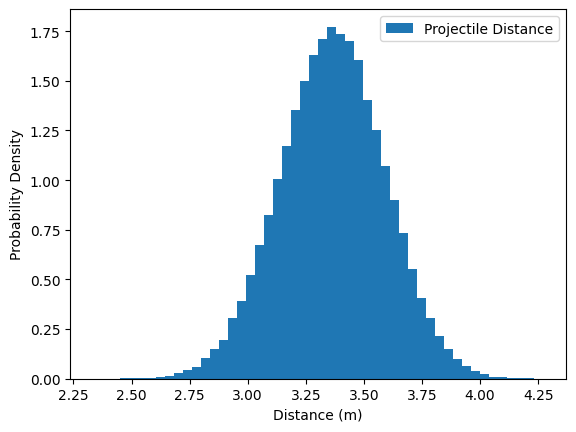

Probability that the projectile will fall into the specified range: 17.32%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_samples = 10**5
gravitational_acceleration = 9.81

# Convert angle from degrees to radians
launch_angle = np.deg2rad(40)
angle_error = np.deg2rad(4)

# Generate N samples from a normal distribution
initial_height = np.random.normal(5.314, 0.004, num_samples)
initial_velocity = np.random.normal(3.42, 0.15, num_samples)
launch_angle = np.random.normal(launch_angle, angle_error, num_samples)

# Calculate projectile distance
projectile_distance = (initial_velocity * np.cos(launch_angle) / gravitational_acceleration) * (
    initial_velocity * np.sin(launch_angle) + np.sqrt(initial_velocity**2 * (np.sin(launch_angle))**2 + 2 * gravitational_acceleration * initial_height)
)

# Calculate mean and standard deviation
mean_distance = np.mean(projectile_distance)
std_distance = np.std(projectile_distance)
print("Mean Distance <x>: {:.2f}".format(mean_distance))
print("Standard Deviation Ax: {:.2f}".format(std_distance))

# Plot histogram
plt.hist(projectile_distance, bins=50, density=True, label='Projectile Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Find out the probability by using Monte Carlo sampling
lower_bound = 3.3
upper_bound = 3.4
count_within_bounds = np.sum((lower_bound <= projectile_distance) & (projectile_distance <= upper_bound))

probability_within_bounds = (count_within_bounds / num_samples) * 100
print("Probability that the projectile will fall into the specified range: {:.2f}%".format(probability_within_bounds))


## <font color=#46769B>Part (d): Sampling from exponential distribution</font>

Suppose isotope $A$ decays with a lifetime $\tau_A = 3$ (e.g., 3 hours). Perform the following tasks:

- Write a code that will draw $N = 10^6$ samples for $t$ from the exponential distribution given above, using the inverse CDF method.

- Determine the half-life $t_{1/2}$ as the 50\% quantile (median) of your sample.

- Determine the time it takes for 99\% of $A$ to decay away by determining the 99\% quantile for your sample.

- Plot a histogram of your samples for $t$. On the same plot, plot the PDF $P(t)$. Be sure to add a legend to your plot and choose an appropriate bin for your histogram, and use a log scale for the $y$-axis.

Now, repeat the exercise using a built-in function `numpy.random.exponential()` to sample from an exponential distribution (see documentation [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html)). You should see agreement between the two approaches.

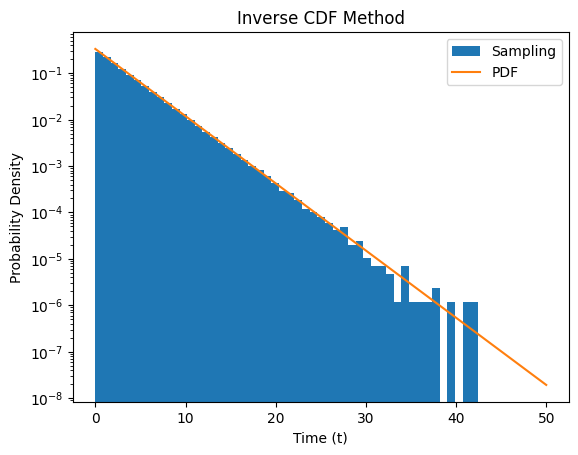

Half-life (t_1/2): 2.08 hours
Time for 99% decay: 13.84 hours


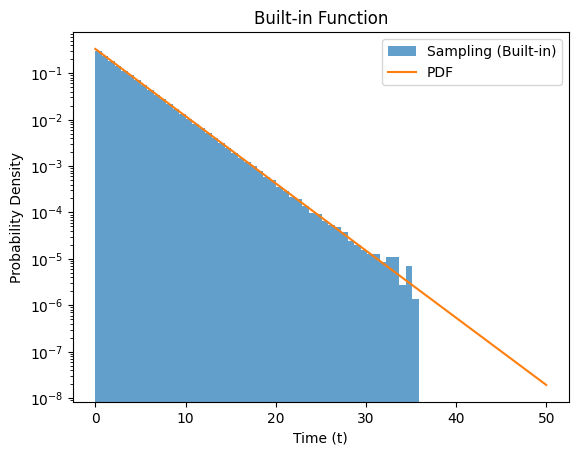

Quantiles for Inverse CDF Method:
50% quantile (t_1/2): 2.08 hours
99% quantile: 13.84 hours

Quantiles for Built-in Function:
50% quantile (t_1/2): 2.08 hours
99% quantile: 13.81 hours


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
nu = 10**6
a = 1/3

# Draw samples using the inverse CDF method
samples = -1/a * np.log(1 - np.random.rand(nu))

# Plot histogram and compare to original PDF
plt.hist(samples, bins=50, density=True, label='Sampling')
x = np.linspace(0, 50, 100)
PDF = a * np.exp(-a * x)
plt.plot(x, PDF, label='PDF')
plt.legend()
plt.yscale('log')
plt.xlabel('Time (t)')
plt.ylabel('Probability Density')
plt.title('Inverse CDF Method')
plt.show()

# Determine the half-life (50% quantile)
half_life = np.quantile(samples, 0.5)
print(f'Half-life (t_1/2): {half_life:.2f} hours')

# Determine the time for 99% decay (99% quantile)
decay_99_percent = np.quantile(samples, 0.99)
print(f'Time for 99% decay: {decay_99_percent:.2f} hours')

# Using built-in numpy.random.exponential() function
samples_builtin = np.random.exponential(scale=1/a, size=nu)

# Plot histogram and compare to original PDF
plt.hist(samples_builtin, bins=50, density=True, alpha=0.7, label='Sampling (Built-in)')
plt.plot(x, PDF, label='PDF')
plt.legend()
plt.yscale('log')
plt.xlabel('Time (t)')
plt.ylabel('Probability Density')
plt.title('Built-in Function')
plt.show()

# Compare quantiles for both methods
print('Quantiles for Inverse CDF Method:')
print(f'50% quantile (t_1/2): {np.quantile(samples, 0.5):.2f} hours')
print(f'99% quantile: {np.quantile(samples, 0.99):.2f} hours')

print('\nQuantiles for Built-in Function:')
print(f'50% quantile (t_1/2): {np.quantile(samples_builtin, 0.5):.2f} hours')
print(f'99% quantile: {np.quantile(samples_builtin, 0.99):.2f} hours')
